In [1]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
import matplotlib
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from matplotlib import style
from matplotlib import pyplot as plt

C:\Users\rhuth\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
data=pd.read_csv("D:\ML mini projects\student-mat.csv",sep=";")

In [4]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
data=data[['G1','G2','G3','studytime','failures','absences']]
data=shuffle(data)
# to shuffle the data, so they are not in a specific order

In [6]:
label='G3'
# seperating features from the labels
X=np.array(data.drop([label],axis=1))
y=np.array(data[label])

In [7]:
print(X)
print(y)

[[10  0  2  0  0]
 [16 17  1  0  4]
 [ 8 10  2  0  6]
 ...
 [16 17  3  0  0]
 [10 12  1  0  2]
 [ 6  8  1  1  0]]
[ 0 18 10 15  0 16 11  8 12 12  7  0 14  8  9 12 14 10 15 16 10 15  6 19
  0 16  8  9 10  6  6 12 15 11  9 15 15 16 10 12  8 16 10  0  0 11 10 14
  9 14  8 10 11 14 16  9 12 13 12 15 15 12 14 15  9  0  8 11 12  0  5  8
  0  0  9 12 10 11 13  0 11  6  9 20 11  9 11  9 13  5 10  0 11 15 14 10
 10 11  7 10  9  5 15  0 10  8  7 11 14 13 11  0 15 16 13 15  6  8  0 16
 10  0  8 12 12  0 10  9 13 14 10 12 10 18  6 14 11 14  9 12 13 10  6 11
  7 17 10 10  8 10 12 18 11 11 13 10 14 13 12  9 15  7  8 14 10  5 10 14
  6  0 12  0 12 10  7 15 11 19  5 12  0 11 17  7  9 11 10 11  9  9 16 10
 10 12 11 18  9 11 14 12 10 11 18  8 11 11 11  6 10 15 15  8  8  0 13  8
 14 14  0 15 10 15  9  0 14  6 16 13  0 19 12 10  8 11  8 18 11  0 16 11
  8 13 11 13 11 16  9  4 11 11 18  6 17  7 11 10  0 10  8  9 12 12 15 10
  8 11 12 17 10  0 16  8  8 11 15 11 15 11  0 18 13 15 12 15 15  0  9 18
 10 15  6 

In [8]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
# keeping 20% test data seperate

In [9]:
"""
best=0
for _ in range(100):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
    linear=linear_model.LinearRegression()
    # linear regression model
    linear.fit(x_train,y_train)
    # fitting on the training dataset
    acc=linear.score(x_test,y_test)
    # getting the accuracy on the test data after training
    print("accuracy: ",acc*100)
    if(acc>best):
        best=acc
        print("best ",best*100)
        #to not train the dataset again n again we store the best accuracy achieved
        joblib.dump(linear,'studentgrades.pkl')
        """

'\nbest=0\nfor _ in range(100):\n    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)\n    linear=linear_model.LinearRegression()\n    # linear regression model\n    linear.fit(x_train,y_train)\n    # fitting on the training dataset\n    acc=linear.score(x_test,y_test)\n    # getting the accuracy on the test data after training\n    print("accuracy: ",acc*100)\n    if(acc>best):\n        best=acc\n        print("best ",best*100)\n        #to not train the dataset again n again we store the best accuracy achieved\n        joblib.dump(linear,\'studentgrades.pkl\')\n        '

In [10]:
file='studentgrades.pkl'
linear=joblib.load(file)
# loading the file again after getting the best accuracy in linear

In [11]:
print("coefficients:\n",linear.coef_)
# these are the slopes or 'm' in y=mx+c. as there are 5 attributes to be considered it is multidimensional and hence has many slopes
# the slope or attribute with highest value contributes the most to final label or grade
print("Intercept:\n",linear.intercept_)
# intercept on y-axis or where the line cuts on the y-axis

coefficients:
 [ 0.14927808  0.99251651 -0.24167138 -0.37109187  0.04213657]
Intercept:
 -1.5424411321465836


In [12]:
y_pred=linear.predict(x_test)
# predicting the value of the test data

In [13]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [14]:
print("MSE: ",mean_squared_error(y_test,y_pred))
print("MAE: ",mean_absolute_error(y_test,y_pred))

MSE:  3.3703659977419527
MAE:  1.1932091549642223


In [15]:
for i in range(len(y_pred)):
    print(y_pred[i],x_test[i],y_test[i])
# printing the value of the predicticted value, test attributes and comparing it with the predefined test values

4.704224559846117 [6 7 2 3 0] 0
9.220097869266821 [11  9  1  1 19] 10
12.901818913223563 [13 13  2  0  2] 13
-1.929183930787321 [4 0 1 2 0] 0
13.810062290322582 [13 14  2  0  0] 15
9.327157062964446 [ 9 10  2  0  2] 9
9.380441651142286 [ 9 10  3  0  9] 9
12.085968839869027 [12 12  1  0  4] 13
18.61891203479295 [17 18  1  0  0] 18
14.051733672925904 [13 14  1  0  0] 14
9.001212545852217 [ 9 10  3  0  0] 0
15.702767257382598 [16 15  1  0  5] 16
11.947838781933582 [11 12  2  0 10] 13
9.161638645634445 [10 10  4  0  6] 11
8.070166039246372 [10  8  1  0 10] 9
9.150490624711056 [10 10  3  0  0] 9
11.320310255415873 [ 8 12  1  0  0] 12
6.116056314772931 [8 7 2 0 0] 8
10.078002191969047 [ 9 11  3  0  2] 11
4.188827862034 [ 5  5  2  0 12] 5
-1.2183020651232734 [12  0  3  2  0] 0
11.81029812956494 [12 12  2  1 12] 13
-2.150997717664865 [5 0 1 3 0] 0
5.001667154018832 [ 6  6  2  1 13] 8
7.997040925660858 [10  8  2  0 14] 9
15.33468617301592 [16 15  2  0  2] 15
10.683234676639975 [12 11  2  0  0] 

In [16]:
style.use('ggplot')

In [21]:
plot="studytime"

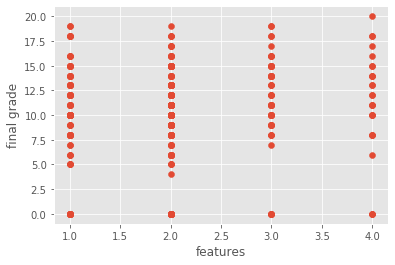

In [22]:
plt.scatter(data[plot],data['G3'])
plt.xlabel('features')
plt.ylabel('final grade')
plt.show()